# Install modules if they aren't already installed
### Delete hashtag before ones you don't have

In [1]:
# !pip install matplotlib
# !pip install numpy
# !pip install pandas
# !pip install statsmodels
# !pip install sklearn

# Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Define a path for import and export
## Don't forget to double slash

In [3]:
path = '/Users/admin/fin427/module2/excelSheets/'

# Import monthly returns for individual S&P 400 stocks

In [4]:
df_stockret = pd.read_excel(path + 'Excel02 S&P 400 historical returns 20221231.xlsx', sheet_name='mth')
print(df_stockret.head())
print(df_stockret.columns)                            

   PERMNO       DATE     CUSIP       COMNAM TICKER  PERMCO   VOL       RET  \
0   10032 1994-12-30  72913210  PLEXUS CORP   PLXS    7980  4506 -0.105263   
1   10032 1995-01-31  72913210  PLEXUS CORP   PLXS    7980  3974  0.470588   
2   10032 1995-02-28  72913210  PLEXUS CORP   PLXS    7980  1673 -0.020000   
3   10032 1995-03-31  72913210  PLEXUS CORP   PLXS    7980  2254  0.020408   
4   10032 1995-04-28  72913210  PLEXUS CORP   PLXS    7980  2129 -0.040000   

   SHROUT     MthEnd  
0    6460 1994-12-31  
1    6460 1995-01-31  
2    6460 1995-02-28  
3    6460 1995-03-31  
4    6460 1995-04-30  
Index(['PERMNO', 'DATE', 'CUSIP', 'COMNAM', 'TICKER', 'PERMCO', 'VOL', 'RET',
       'SHROUT', 'MthEnd'],
      dtype='object')


# Import monthly returns on the S&P 400 index

In [5]:
df_indexret = pd.read_excel(path + 'Excel02 S&P 400 Returns 20221230.xlsx', sheet_name='Mth')
df_indexret['MthRet'] = df_indexret['RetInd'].pct_change()
print(df_indexret.head())
print(df_indexret.columns)

       Month  RetInd     MthEnd    MthRet
0 1994-12-31  182.32 1994-12-31       NaN
1 1995-01-31  184.23 1995-01-31  0.010476
2 1995-02-28  193.88 1995-02-28  0.052380
3 1995-03-31  197.25 1995-03-31  0.017382
4 1995-04-28  201.21 1995-04-30  0.020076
Index(['Month', 'RetInd', 'MthEnd', 'MthRet'], dtype='object')


# Import monthly Fama and French factors

In [6]:
df_ff = pd.read_excel(path + 'Excel02 Fama and French 20230114.xlsx', sheet_name='Mth3')
print(df_ff.head())
print(df_ff.columns)

      MthEnd    RmRf     SMB     HML      Rf
0 1926-07-31  0.0296 -0.0256 -0.0243  0.0022
1 1926-08-31  0.0264 -0.0117  0.0382  0.0025
2 1926-09-30  0.0036 -0.0140  0.0013  0.0023
3 1926-10-31 -0.0324 -0.0009  0.0070  0.0032
4 1926-11-30  0.0253 -0.0010 -0.0051  0.0031
Index(['MthEnd', 'RmRf', 'SMB', 'HML', 'Rf'], dtype='object')


# Combine stock return data with index return data and Fama-French data

In [7]:
df_combret1 = pd.merge(df_stockret, df_indexret, left_on='MthEnd', right_on='MthEnd')
df_combret2 = pd.merge(df_combret1, df_ff, left_on='MthEnd', right_on='MthEnd')
df_combret2 = df_combret2.dropna()

# Compute excess returns

In [8]:
df_combret2['StockretRf'] = df_combret2['RET'] - df_combret2['Rf']
df_combret2['IndexretRf'] = df_combret2['MthRet'] - df_combret2['Rf']

# Remove a company with only two observations

In [9]:
df_combret3 = df_combret2.loc[df_combret2['CUSIP'] != '55919410']
print(df_combret3.head())
print(df_combret3.columns)

     PERMNO       DATE     CUSIP                       COMNAM TICKER  PERMCO  \
909   10032 1995-01-31  72913210                  PLEXUS CORP   PLXS    7980   
910   10108 1995-01-31  86736310     SUNGARD DATA SYSTEMS INC   SNDT    8049   
911   10137 1995-01-31  01736110  ALLEGHENY POWER SYSTEMS INC    AYP   20045   
912   10138 1995-01-31  74144T10       T ROWE PRICE ASSOC INC   TROW    8087   
913   10143 1995-01-31  67104010         ONCOGENE SCIENCE INC   ONCS    8092   

       VOL       RET  SHROUT     MthEnd      Month  RetInd    MthRet   RmRf  \
909   3974  0.470588    6460 1995-01-31 1995-01-31  184.23  0.010476  0.018   
910  15968 -0.071429   18767 1995-01-31 1995-01-31  184.23  0.010476  0.018   
911  26987  0.103448  118894 1995-01-31 1995-01-31  184.23  0.010476  0.018   
912  19680 -0.083333   28569 1995-01-31 1995-01-31  184.23  0.010476  0.018   
913   6027  0.119048   16343 1995-01-31 1995-01-31  184.23  0.010476  0.018   

       SMB     HML      Rf  StockretRf  Inde

# Example regression for one company - NVIDIA
# Selecting rows based on condition

In [10]:
TestCUSIPS2 = ['67066G10']
df_combret4 = df_combret3[df_combret3['CUSIP'].isin(TestCUSIPS2)]
print(df_combret4.head())
print(df_combret4.columns)

       PERMNO       DATE     CUSIP       COMNAM TICKER  PERMCO    VOL  \
50418   86580 1999-02-26  67066G10  NVIDIA CORP   NVDA   16382  65851   
51443   86580 1999-03-31  67066G10  NVIDIA CORP   NVDA   16382  42386   
52472   86580 1999-04-30  67066G10  NVIDIA CORP   NVDA   16382  37338   
53500   86580 1999-05-28  67066G10  NVIDIA CORP   NVDA   16382  51938   
54530   86580 1999-06-30  67066G10  NVIDIA CORP   NVDA   16382  50578   

            RET  SHROUT     MthEnd      Month  RetInd    MthRet    RmRf  \
50418  0.154605   28596 1999-02-28 1999-02-26  408.30 -0.052360 -0.0408   
51443 -0.037037   28596 1999-03-31 1999-03-31  419.71  0.027945  0.0345   
52472 -0.136095   29309 1999-04-30 1999-04-30  452.81  0.078864  0.0433   
53500 -0.065068   29309 1999-05-31 1999-05-31  454.77  0.004329 -0.0246   
54530  0.120879   29309 1999-06-30 1999-06-30  479.12  0.053544  0.0477   

          SMB     HML      Rf  StockretRf  IndexretRf  
50418 -0.0609  0.0192  0.0035    0.151105   -0.055860 

In [11]:
y = df_combret4['StockretRf']
x = df_combret4[['IndexretRf']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)
print(predictions)

                            OLS Regression Results                            
Dep. Variable:             StockretRf   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     76.92
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           1.87e-16
Time:                        15:33:38   Log-Likelihood:                 120.30
No. Observations:                 278   AIC:                            -236.6
Df Residuals:                     276   BIC:                            -229.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0242      0.010      2.523      0.0

# Regression using polyfit

In [12]:
x1 = df_combret4.IndexretRf
y1 = df_combret4.StockretRf
m, b = np.polyfit(x1, y1, 1)
print("Slope: " + str(round(m, 3)))
print("Coefficient: " + str(round(b, 6)))

Slope: 1.638
Coefficient: 0.024154


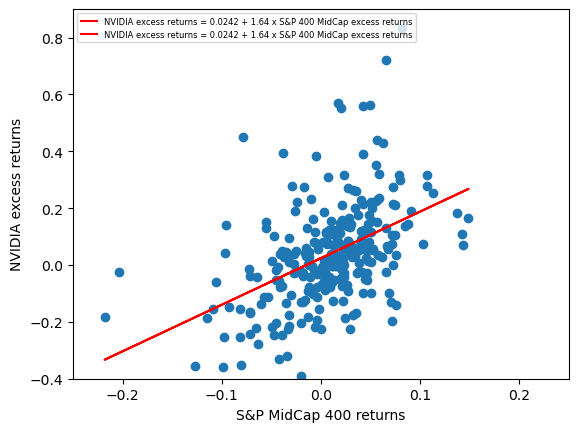

In [13]:
plt.plot(x1, y1, 'o')
plt.plot(x, m * x + b, 'red', label='NVIDIA excess returns = {:.4f} + {:.2f} x S&P 400 MidCap excess returns'.format(b, m))
plt.legend(loc='upper left', fontsize=6)
plt.xlabel('S&P MidCap 400 returns')
plt.ylabel('NVIDIA excess returns')
plt.xlim([-0.25, 0.25])
plt.ylim([-0.40, 0.90])
plt.savefig(path + 'Chart02 NVIDIA beta.jpg')
plt.show()

# Example regression for 3 companies - NVIDIA, Qualcomm and AMD

In [14]:
TestCUSIPS3 = ['67066G10', '74752510', '00790310']
df_combret5 = df_combret3[df_combret3['CUSIP'].isin(TestCUSIPS3)]

In [15]:
def regress(df_combret5, yvar, xvars):
    y3 = df_combret5['StockretRf']
    x3 = df_combret5['IndexretRf']
    x3 = sm.add_constant(x3)
    model3 = sm.OLS(y3, x3).fit()
    predictions3 = model3.predict(x3)
    r2 = r2_score(y3, predictions3)
    return model3.params, r2

In [16]:
output3 = df_combret5.groupby('CUSIP').apply(regress, yvar='y3', xvars=['x3'])
print(output3)

CUSIP
00790310    ([0.004733895568024394, 1.843857118853719], 0....
67066G10    ([0.024153952290012024, 1.6381553411165466], 0...
74752510    ([0.013231097987915653, 1.0195272931505581], 0...
dtype: object


# Running the regression on all companies

In [17]:
def regressall(df_combret3, yvar, xvars):
    yall = df_combret3['StockretRf']
    xall = df_combret3['IndexretRf']
    xall = sm.add_constant(xall)
    modelall = sm.OLS(yall, xall).fit()
    predictionsall = modelall.predict(xall)
    r2all = r2_score(yall, predictionsall)
    return modelall.params

In [18]:
output = df_combret3.groupby('CUSIP').apply(regressall, yvar='yall', xvars=['xall'])
print(output)

             const  IndexretRf
CUSIP                         
00088630 -0.005014    1.866020
00105510  0.004649    0.942049
00108410  0.001261    1.202272
00120410  0.005865    0.335126
00130H10  0.001786    1.342864
...            ...         ...
G8721010 -0.000574    1.177051
G9402V10 -0.050874    2.225614
G9782210  0.001653    0.530310
H8817H10 -0.005401    1.655519
N2271710  0.003940    1.443821

[1512 rows x 2 columns]


# Regression to show the inverse relationship between estimates of alpha and index exposure

In [19]:
x4 = output.IndexretRf
y4 = output.const
m, b = np.polyfit(x4, y4, 1)
print("Slope: " + str(round(m, 3)))
print("Coefficient: " + str(round(b, 6)))

Slope: -0.013
Coefficient: 0.017541


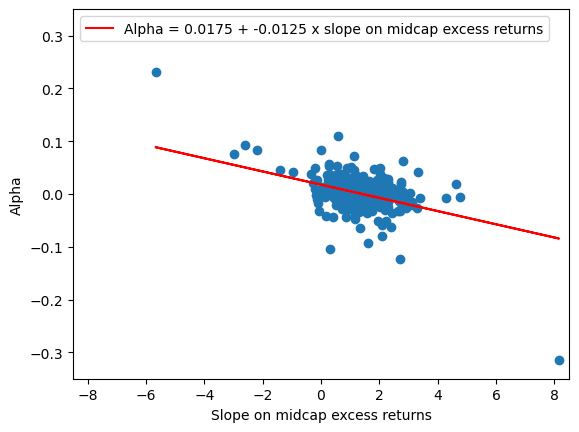

In [20]:
plt.plot(x4, y4, 'o')
plt.plot(x4, m * x4 + b, 'red', label='Alpha = {:.4f} + {:.4f} x slope on midcap excess returns'.format(b, m))
plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Slope on midcap excess returns')
plt.ylabel('Alpha')
plt.xlim([-8.5, 8.5])
plt.ylim([-0.35, 0.35])
plt.savefig(path + 'Chart02 Alpha and beta.jpg')
plt.show()

# Export results to Excel

In [21]:
with pd.ExcelWriter(path + 'Excel02 Beta estimates 20230114.xlsx') as writer:
    output3.to_excel(writer, sheet_name='Coefficients 3')
    output.to_excel(writer, sheet_name='Coefficients All')